# Programming Assignment - 6
---
## Name: Aaron Vo
---

In [20]:
# Import required packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
import matplotlib.pyplot as mat
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm

## Question 1
---
(An open ended asignment) Visit the University of California open source [data repository](https://archive.ics.uci.edu/ml/datasets.php). Pick up an appropriate dataset of you choice preferably one with default-task 'classification'. Follow the example provided during the class to get some insight from the data that you have selected.  In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

>- Observation of covariance and correlation between different features (columns, explanatory variables).

>- Distribution of different features and observations.

>- Utilize PCA to describe low-dimension representations.

>- Use plots such as Scree-plot, Bi-plot etc.

>- Discuss and clustering behaviours around the classes exposed by the first few PCs.

>- Anything else that you find interesting.

In [21]:
# Your code comes here
heading =['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']
data = pd.read_csv("adult.data", header=None, names = heading, na_values="?", skipinitialspace = True)
data = data.replace({'\$': '', ',': ''}, regex=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
object_col = data.select_dtypes(include=object).columns.tolist()
for col in object_col:
    print(data[col].value_counts(dropna=False)/data.shape[0],'\n')
    
for col in object_col:
    data.loc[data[col]=='?', col] = np.nan
data = data.dropna(axis=0, how='any')

# Perform an mssing assessment in each column of the dataset.
col_missing_pct = data.isna().sum()/data.shape[0]
col_missing_pct.sort_values(ascending=False)

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
NaN                 0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64 

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64 

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital-status, dtype: floa

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

<=50K    22654
>50K      7508
Name: income, dtype: int64


<AxesSubplot: ylabel='income'>

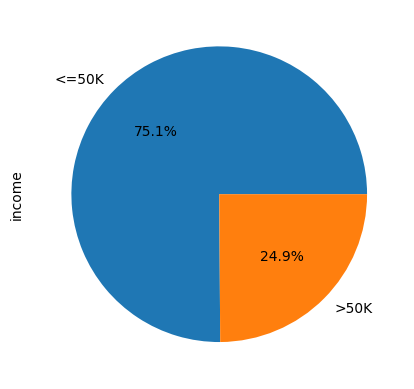

In [24]:
print(data['income'].value_counts())
data['income'].value_counts().plot.pie(autopct='%1.1f%%')

In [25]:
data["income_bin"] = (data["income"] == ">50K").astype(int) # if <=50k, return 1
data['gender_bin'] = (data['sex'] == "Male").astype(int)

<AxesSubplot: >

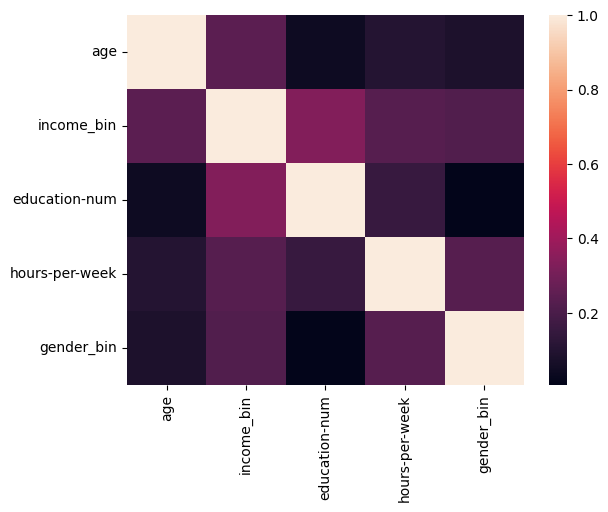

In [26]:
corr = data[['age', 'income_bin', 'education-num', 'hours-per-week', 'gender_bin']].corr()
sns.heatmap(corr)

Given the correlation heatmap of all numerical values, we were able to determine that the education correlated most with a high income while hours per week and gender has similar income output.


/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_88628/2940826362.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/total_F))
/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_88628/2940826362.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/total_M))
/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_88628/2940826362.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


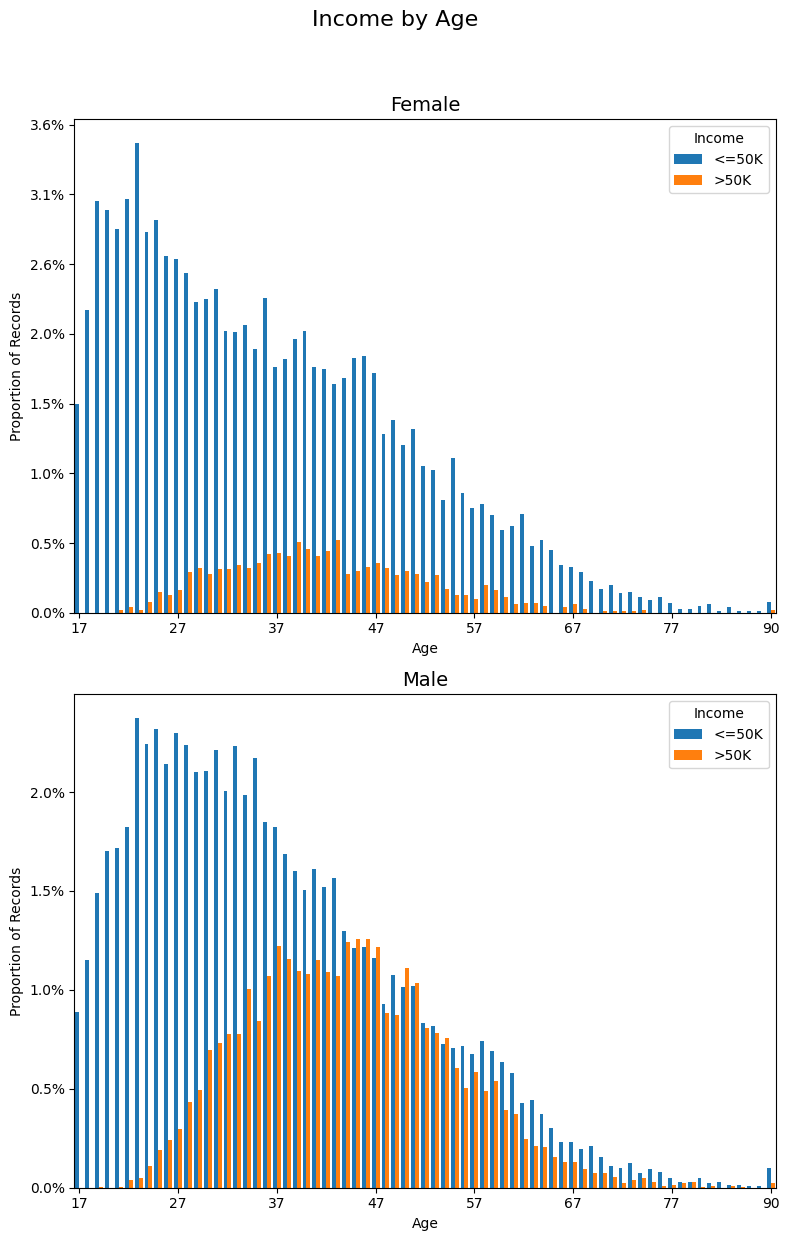

In [27]:
fig, ax =plt.subplots(2,1, figsize = (8, 12))
# fig = plt.figure(figsize = (10,13));

# Initiate plot
sns.countplot(x = 'age', hue = 'income', data = data[data.sex=='Female'], saturation=1, ax=ax[0])
sns.countplot(x = 'age', hue = 'income', data = data[data.sex=='Male'], saturation=1, ax=ax[1])

# Add titles
ax[0].set_title('Female', loc='center', fontsize = 14)
ax[1].set_title('Male', loc='center', fontsize = 14)

# Add labels
ax[0].set_xlabel("Age")
ax[1].set_xlabel("Age")
ax[0].set_ylabel("Proportion of Records")
ax[1].set_ylabel("Proportion of Records")

# Add x_axis ticks
new_ticks = [i.get_text() for i in ax[0].get_xticklabels()]
ax[0].set_xticks(range(0, len(new_ticks), 10))
ax[0].set_xticklabels(new_ticks[::10])
ax[1].set_xticks(range(0, len(new_ticks), 10))
ax[1].set_xticklabels(new_ticks[::10])

# Optimize y_axis ticks
total_F = data[data.sex=='Female'].shape[0]*1.
total_M = data[data.sex=='Male'].shape[0]*1.
ax[0].set_yticklabels(map('{:.1f}%'.format, 100*ax[0].yaxis.get_majorticklocs()/total_F))
ax[1].set_yticklabels(map('{:.1f}%'.format, 100*ax[1].yaxis.get_majorticklocs()/total_M))

# Change legend location
ax[0].legend(loc=1, title='Income')
ax[1].legend(loc=1, title='Income')

# Set suptitle
fig.suptitle("Income by Age", fontsize = 16, y = 1.03)

fig.tight_layout()
fig.show()

Here we see that income for male and females varies quite differently. We see that more men make  >50K for the income between their late 20s till pass what is considered retirement age. Women tend to make over 50k around the same time but not as late. However, much fewer women make this much as we see that more men make >50k in their late 40s to early 50s than men who make <=50k

/var/folders/2c/db_0lrw50h16d5cqvl89fg3c0000gn/T/ipykernel_88628/3828014282.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))


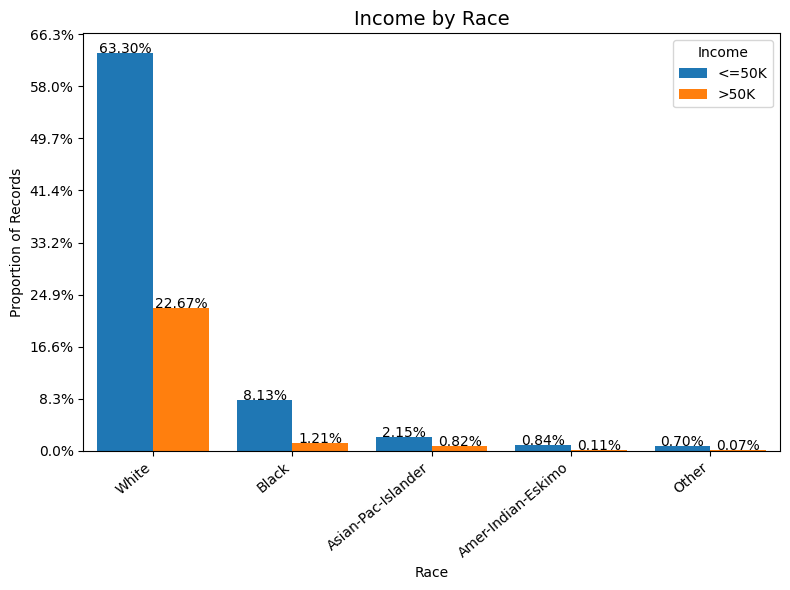

In [28]:
# Use occupation percentage of '>50K' as order of the plot
order = (data.race[data.income=='>50K'].value_counts()/data.shape[0]).index

# Plotting the income by age
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'race', hue = 'income', order = order, data = data, saturation=1)
ax.set_title('Income by Race', fontsize = 14)
ax.set_xlabel("Race")
ax.set_ylabel("Proportion of Records")

# new_ticks = [i.get_text() for i in ax.get_xticklabels()]
# plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

total = data.shape[0]*1.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.legend(loc=1, title='Income')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100.0),
            ha="center") 
    
plt.tight_layout()
plt.show()



Here we see that a third of the individuals who are white, who make <=50k, make >50k where as for other race, that ratio is significantly smaller

In [29]:
# Apply PCA to the 
pca = PCA()
data_copy = data.copy()

In [30]:
data_copy = data_copy.drop('fnlwgt', axis=1)
data_copy = data_copy.drop('income', axis=1)
data_copy = data_copy.drop('workclass', axis=1)
data_copy = data_copy.drop('marital-status', axis=1)
data_copy = data_copy.drop('education', axis=1)
data_copy = data_copy.drop('occupation', axis=1)
data_copy = data_copy.drop('relationship', axis=1)
data_copy = data_copy.drop('sex', axis=1)
data_copy = data_copy.drop('race', axis=1)
data_copy = data_copy.drop('native-country', axis=1)

In [31]:
model = pca.fit_transform(data_copy)

In [32]:
def plot_pc(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT: None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 8))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

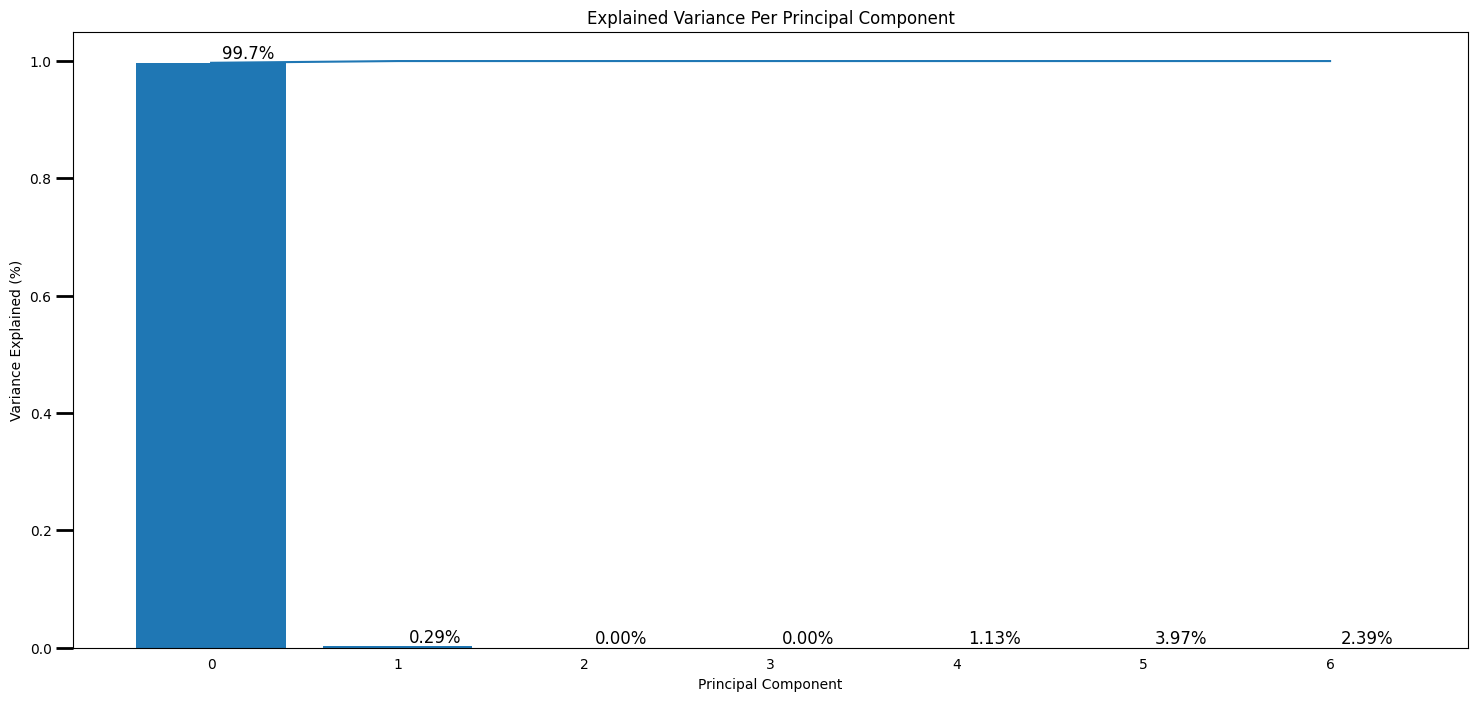

In [33]:
plot_pc(pca)